# Analisis preliminar de los datos

Primero se analizan algunos datos para tener una idea general de los mismos. Luego se trabaja con algunas técnicas de clustering.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
pobla_muni = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=";")

In [ ]:
muni_pob = pobla_muni[(pobla_muni['despoblado_1998'] - pobla_muni['despoblado_2023']) == 1]
muni_desp = pobla_muni[(pobla_muni['despoblado_1998'] - pobla_muni['despoblado_2023']) == -1]
print(muni_pob.shape)
print(muni_desp.shape)

(268, 28)
(204, 28)


In [ ]:
muni_pob.head()

codigo_provincia  nombre_provincia  codigo_municipio  \
6                   1       Araba/Álava              1058   
22                  1       Araba/Álava              1063   
28                  1       Araba/Álava              1001   
41                  1       Araba/Álava              1901   
138                 3  Alicante/Alacant              3097   

           nombre_municipio  mujeres_2023  hombres_2023  total_2023  \
6                   Legutio         982.0        1066.0      2048.0   
22                     Zuia        1116.0        1227.0      2343.0   
28         Alegría-Dulantzi        1436.0        1539.0      2975.0   
41   Iruña Oka/Iruña de Oca        1679.0        1918.0      3597.0   
138                    Orba        1214.0        1165.0      2379.0   

     despoblado_2023  mujeres_2018  hombres_2018  ...  total_2008  \
6                  0         877.0         992.0  ...      1604.0   
22                 0        1120.0        1193.0  ...      2379.0   
28                 0        1380.0        1507.0  ...      2467.0   
41                 0        1612.0        1721.0  ...      2783.0   
138                0        1075.0        1036.0  ...      2566.0   

     despoblado_2008  mujeres_2003  hombres_2003  total_2003  despoblado_2003  \
6                  1         682.0         760.0      1442.0                1   
22                 0        1013.0        1085.0      2098.0                0   
28                 0         822.0         885.0      1707.0                1   
41                 0         925.0        1081.0      2006.0                0   
138                0         935.0         889.0      1824.0                1   

     mujeres_1998  hombres_1998  total_1998  despoblado_1998  
6           631.0         693.0      1324.0                1  
22          782.0         796.0      1578.0                1  
28          603.0         656.0      1259.0                1  
41          797.0         886.0      1683.0                1  
138         813.0         761.0      1574.0                1  

[5 rows x 28 columns]

In [ ]:
print("Municipio con mayor poblacion dentro de los poblados: " + muni_pob.loc[muni_pob["total_2023"] == muni_pob["total_2023"].max(), "nombre_municipio"].values[0])
print("Municipio con menor poblacion dentro de los poblados: " + muni_pob.loc[muni_pob["total_2023"] == muni_pob["total_2023"].min(), "nombre_municipio"].values[0])
print("Municipio con mayor poblacion dentro de los despoblados: " + muni_desp.loc[muni_desp["total_2023"] == muni_desp["total_2023"].max(), "nombre_municipio"].values[0])
print("Municipio con menor poblacion dentro de los despoblados: " + muni_desp.loc[muni_desp["total_2023"] == muni_desp["total_2023"].min(), "nombre_municipio"].values[0])

Municipio con mayor poblacion dentro de los poblados: Cuarte de Huerva
Municipio con menor poblacion dentro de los poblados: Albuera, La
Municipio con mayor poblacion dentro de los despoblados: Castril
Municipio con menor poblacion dentro de los despoblados: Marracos


In [ ]:
print("Poblacion 2023 en Cuarte de Huerva: " + str(pobla_muni.loc[pobla_muni["nombre_municipio"] == "Cuarte de Huerva", "total_2023"].values[0]))
print("Poblacion 1998 en Cuarte de Huerva: " + str(pobla_muni.loc[pobla_muni["nombre_municipio"] == "Cuarte de Huerva", "total_1998"].values[0]))
print("Poblacion 2023 en Albuera, La: " + str(pobla_muni.loc[pobla_muni["nombre_municipio"] == "Albuera, La", "total_2023"].values[0]))
print("Poblacion 1998 en Albuera, La: " + str(pobla_muni.loc[pobla_muni["nombre_municipio"] == "Albuera, La", "total_1998"].values[0]))
print("Poblacion 2023 en Castril: " + str(pobla_muni.loc[pobla_muni["nombre_municipio"] == "Castril", "total_2023"].values[0]))
print("Poblacion 1998 en Castril: " + str(pobla_muni.loc[pobla_muni["nombre_municipio"] == "Castril", "total_1998"].values[0]))
print("Poblacion 2023 en Marracos: " + str(pobla_muni.loc[pobla_muni["nombre_municipio"] == "Marracos", "total_2023"].values[0]))
print("Poblacion 1998 en Marracos: " + str(pobla_muni.loc[pobla_muni["nombre_municipio"] == "Marracos", "total_1998"].values[0]))

Poblacion 2023 en Cuarte de Huerva: 14701.0
Poblacion 1998 en Cuarte de Huerva: 1746.0
Poblacion 2023 en Albuera, La: 2002.0
Poblacion 1998 en Albuera, La: 1788.0
Poblacion 2023 en Castril: 1992.0
Poblacion 1998 en Castril: 2848.0
Poblacion 2023 en Marracos: 87.0
Poblacion 1998 en Marracos: nan


In [1]:
# 0.1 load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving despob_pob_actividad_ocupados_ipc_pib_2023.csv to despob_pob_actividad_ocupados_ipc_pib_2023.csv
User uploaded file "despob_pob_actividad_ocupados_ipc_pib_2023.csv" with length 14593 bytes


In [2]:
# 0.2 load data in DataFrame
import pandas as pd
import io
df1 = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=";")

In [3]:
df1.head()

cod_prov          nom_prov  porcen_desp  pob_tot  pob_hom  pob_muj  \
0         1       Araba/Álava           80   336686   165743   170943   
1         2          Albacete           73   387174   193676   193498   
2         3  Alicante/Alacant           44  1950357   963046   987311   
3         4           Almería           62   753920   385180   368740   
4         5             Ávila           94   158407    79551    78856   

   asexos_tactividad  asexos_templeo  asexos_tparo  hombres_tactividad  ...  \
0              58.33           54.36          6.80               64.94  ...   
1              59.00           51.98         11.88               66.18  ...   
2              58.41           50.70         13.22               63.68  ...   
3              61.16           51.44         15.87               67.63  ...   
4              53.84           47.52         11.72               60.37  ...   

   pib_prec  pib_agri  pib_indu  pib_ind_manu  pib_constr  pib_comer  \
0  12939983    201362   3832143       3473573      400677    1946392   
1   8663814    884324   1397006       1018831      465911    1559382   
2  37279735    547312   3627964       2916222     2556047    9851680   
3  15659622   2443690   1348695       1020119      723957    3793774   
4   3300110    141202    324441        251439      266759     645518   

   pib_act_fin  pib_admin  pib_valor_brut  pib_imp_netos  
0      2434844    2891885        11707303        1232680  
1      1440261    2091603         7838487         825327  
2      8929332    8216082        33728417        3551318  
3      2816431    3041318        14167865        1491757  
4       678479     929338         2985737         314373  

[5 rows x 41 columns]

In [ ]:
print("Provincia con mayor % de despoblamiento: " + df1.loc[df1["porcen_desp"] == df1["porcen_desp"].max(), "nom_prov"].values[0] + " " + str(df1.loc[df1["porcen_desp"] == df1["porcen_desp"].max(), "porcen_desp"].values[0]) )
print("Provincia con menor % de despoblamiento: " + df1.loc[df1["porcen_desp"] == df1["porcen_desp"].min(), "nom_prov"].values[0] + " " + str(df1.loc[df1["porcen_desp"] == df1["porcen_desp"].min(), "porcen_desp"].values[0]) )
print("Provincia con mayor poblacion total: " + df1.loc[df1["pob_tot"] == df1["pob_tot"].max(), "nom_prov"].values[0] + " " + str(df1.loc[df1["pob_tot"] == df1["pob_tot"].max(), "pob_tot"].values[0]) )
print("Provincia con menor poblacion total: " + df1.loc[df1["pob_tot"] == df1["pob_tot"].min(), "nom_prov"].values[0] + " " + str(df1.loc[df1["pob_tot"] == df1["pob_tot"].min(), "pob_tot"].values[0]) )
print("Provincia con mayor poblacion de hombres: " + df1.loc[df1["pob_hom"] == df1["pob_hom"].max(), "nom_prov"].values[0] + " " + str(df1.loc[df1["pob_hom"] == df1["pob_hom"].max(), "pob_hom"].values[0])  )
print("Provincia con menor poblacion de hombres: " + df1.loc[df1["pob_hom"] == df1["pob_hom"].min(), "nom_prov"].values[0] + " " + str(df1.loc[df1["pob_hom"] == df1["pob_hom"].min(), "pob_hom"].values[0])  )
print("Provincia con mayor poblacion de mujeres: " + df1.loc[df1["pob_muj"] == df1["pob_muj"].max(), "nom_prov"].values[0] + " " + str(df1.loc[df1["pob_muj"] == df1["pob_muj"].max(), "pob_muj"].values[0])  )
print("Provincia con menor poblacion de mujeres: " + df1.loc[df1["pob_muj"] == df1["pob_muj"].min(), "nom_prov"].values[0] + " " + str(df1.loc[df1["pob_muj"] == df1["pob_muj"].min(), "pob_muj"].values[0])  )
print("Provincia con mayor tasa de actividad: " + df1.loc[df1["asexos_tactividad"] == df1["asexos_tactividad"].max(), "nom_prov"].values[0] + " " + str(df1.loc[df1["asexos_tactividad"] == df1["asexos_tactividad"].max(), "asexos_tactividad"].values[0]) )
print("Provincia con menor tasa de actividad: " + df1.loc[df1["asexos_tactividad"] == df1["asexos_tactividad"].min(), "nom_prov"].values[0] + " " + str(df1.loc[df1["asexos_tactividad"] == df1["asexos_tactividad"].min(), "asexos_tactividad"].values[0]) )
print("Provincia con mayor tasa de empleo: " + df1.loc[df1["asexos_templeo"] == df1["asexos_templeo"].max(), "nom_prov"].values[0] + " " + str(df1.loc[df1["asexos_templeo"] == df1["asexos_templeo"].max(), "asexos_templeo"].values[0]) )
print("Provincia con menor tasa de empleo: " + df1.loc[df1["asexos_templeo"] == df1["asexos_templeo"].min(), "nom_prov"].values[0] + " " + str(df1.loc[df1["asexos_templeo"] == df1["asexos_templeo"].min(), "asexos_templeo"].values[0]) )
print("Provincia con mayor tasa de paro: " + df1.loc[df1["asexos_tparo"] == df1["asexos_tparo"].max(), "nom_prov"].values[0] + " " + str(df1.loc[df1["asexos_tparo"] == df1["asexos_tparo"].max(), "asexos_tparo"].values[0]))
print("Provincia con menor tasa de paro: " + df1.loc[df1["asexos_tparo"] == df1["asexos_tparo"].min(), "nom_prov"].values[0] + " " + str(df1.loc[df1["asexos_tparo"] == df1["asexos_tparo"].min(), "asexos_tparo"].values[0]))

Provincia con mayor % de despoblamiento: Zamora 98
Provincia con menor % de despoblamiento: Ceuta 0
Provincia con mayor poblacion total: Madrid 6859914
Provincia con menor poblacion total: Ceuta 83039
Provincia con mayor poblacion de hombres: Madrid 3279823
Provincia con menor poblacion de hombres: Ceuta 41894
Provincia con mayor poblacion de mujeres: Madrid 3580091
Provincia con menor poblacion de mujeres: Ceuta 41145
Provincia con mayor tasa de actividad: Guadalajara 64.51
Provincia con menor tasa de actividad: Ourense 48.79
Provincia con mayor tasa de empleo: Guadalajara 58.12
Provincia con menor tasa de empleo: Jaén 42.54
Provincia con mayor tasa de paro: Ceuta 26.87
Provincia con menor tasa de paro: Araba/Álava 6.8


In [ ]:
print(df1.keys())

Index(['cod_prov', 'nom_prov', 'porcen_desp', 'pob_tot', 'pob_hom', 'pob_muj',
       'asexos_tactividad', 'asexos_templeo', 'asexos_tparo',
       'hombres_tactividad', 'hombres_templeo', 'hombres_tparo',
       'mujeres_tactividad', 'mujeres_templeo', 'mujeres_tparo',
       'ocupados_agricultura', 'ocupados_construccion', 'ocupados_industria',
       'ocupados_servicios', 'ipc_alim', 'ipc_bebi', 'ipc_vest', 'ipc_vivi',
       'ipc_hoga', 'ipc_sani', 'ipc_trans', 'ipc_comu', 'ipc_ocio', 'ipc_ense',
       'ipc_resta', 'ipc_otros', 'pib_prec', 'pib_agri', 'pib_indu',
       'pib_ind_manu', 'pib_constr', 'pib_comer', 'pib_act_fin', 'pib_admin',
       'pib_valor_brut', 'pib_imp_netos'],
      dtype='object')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

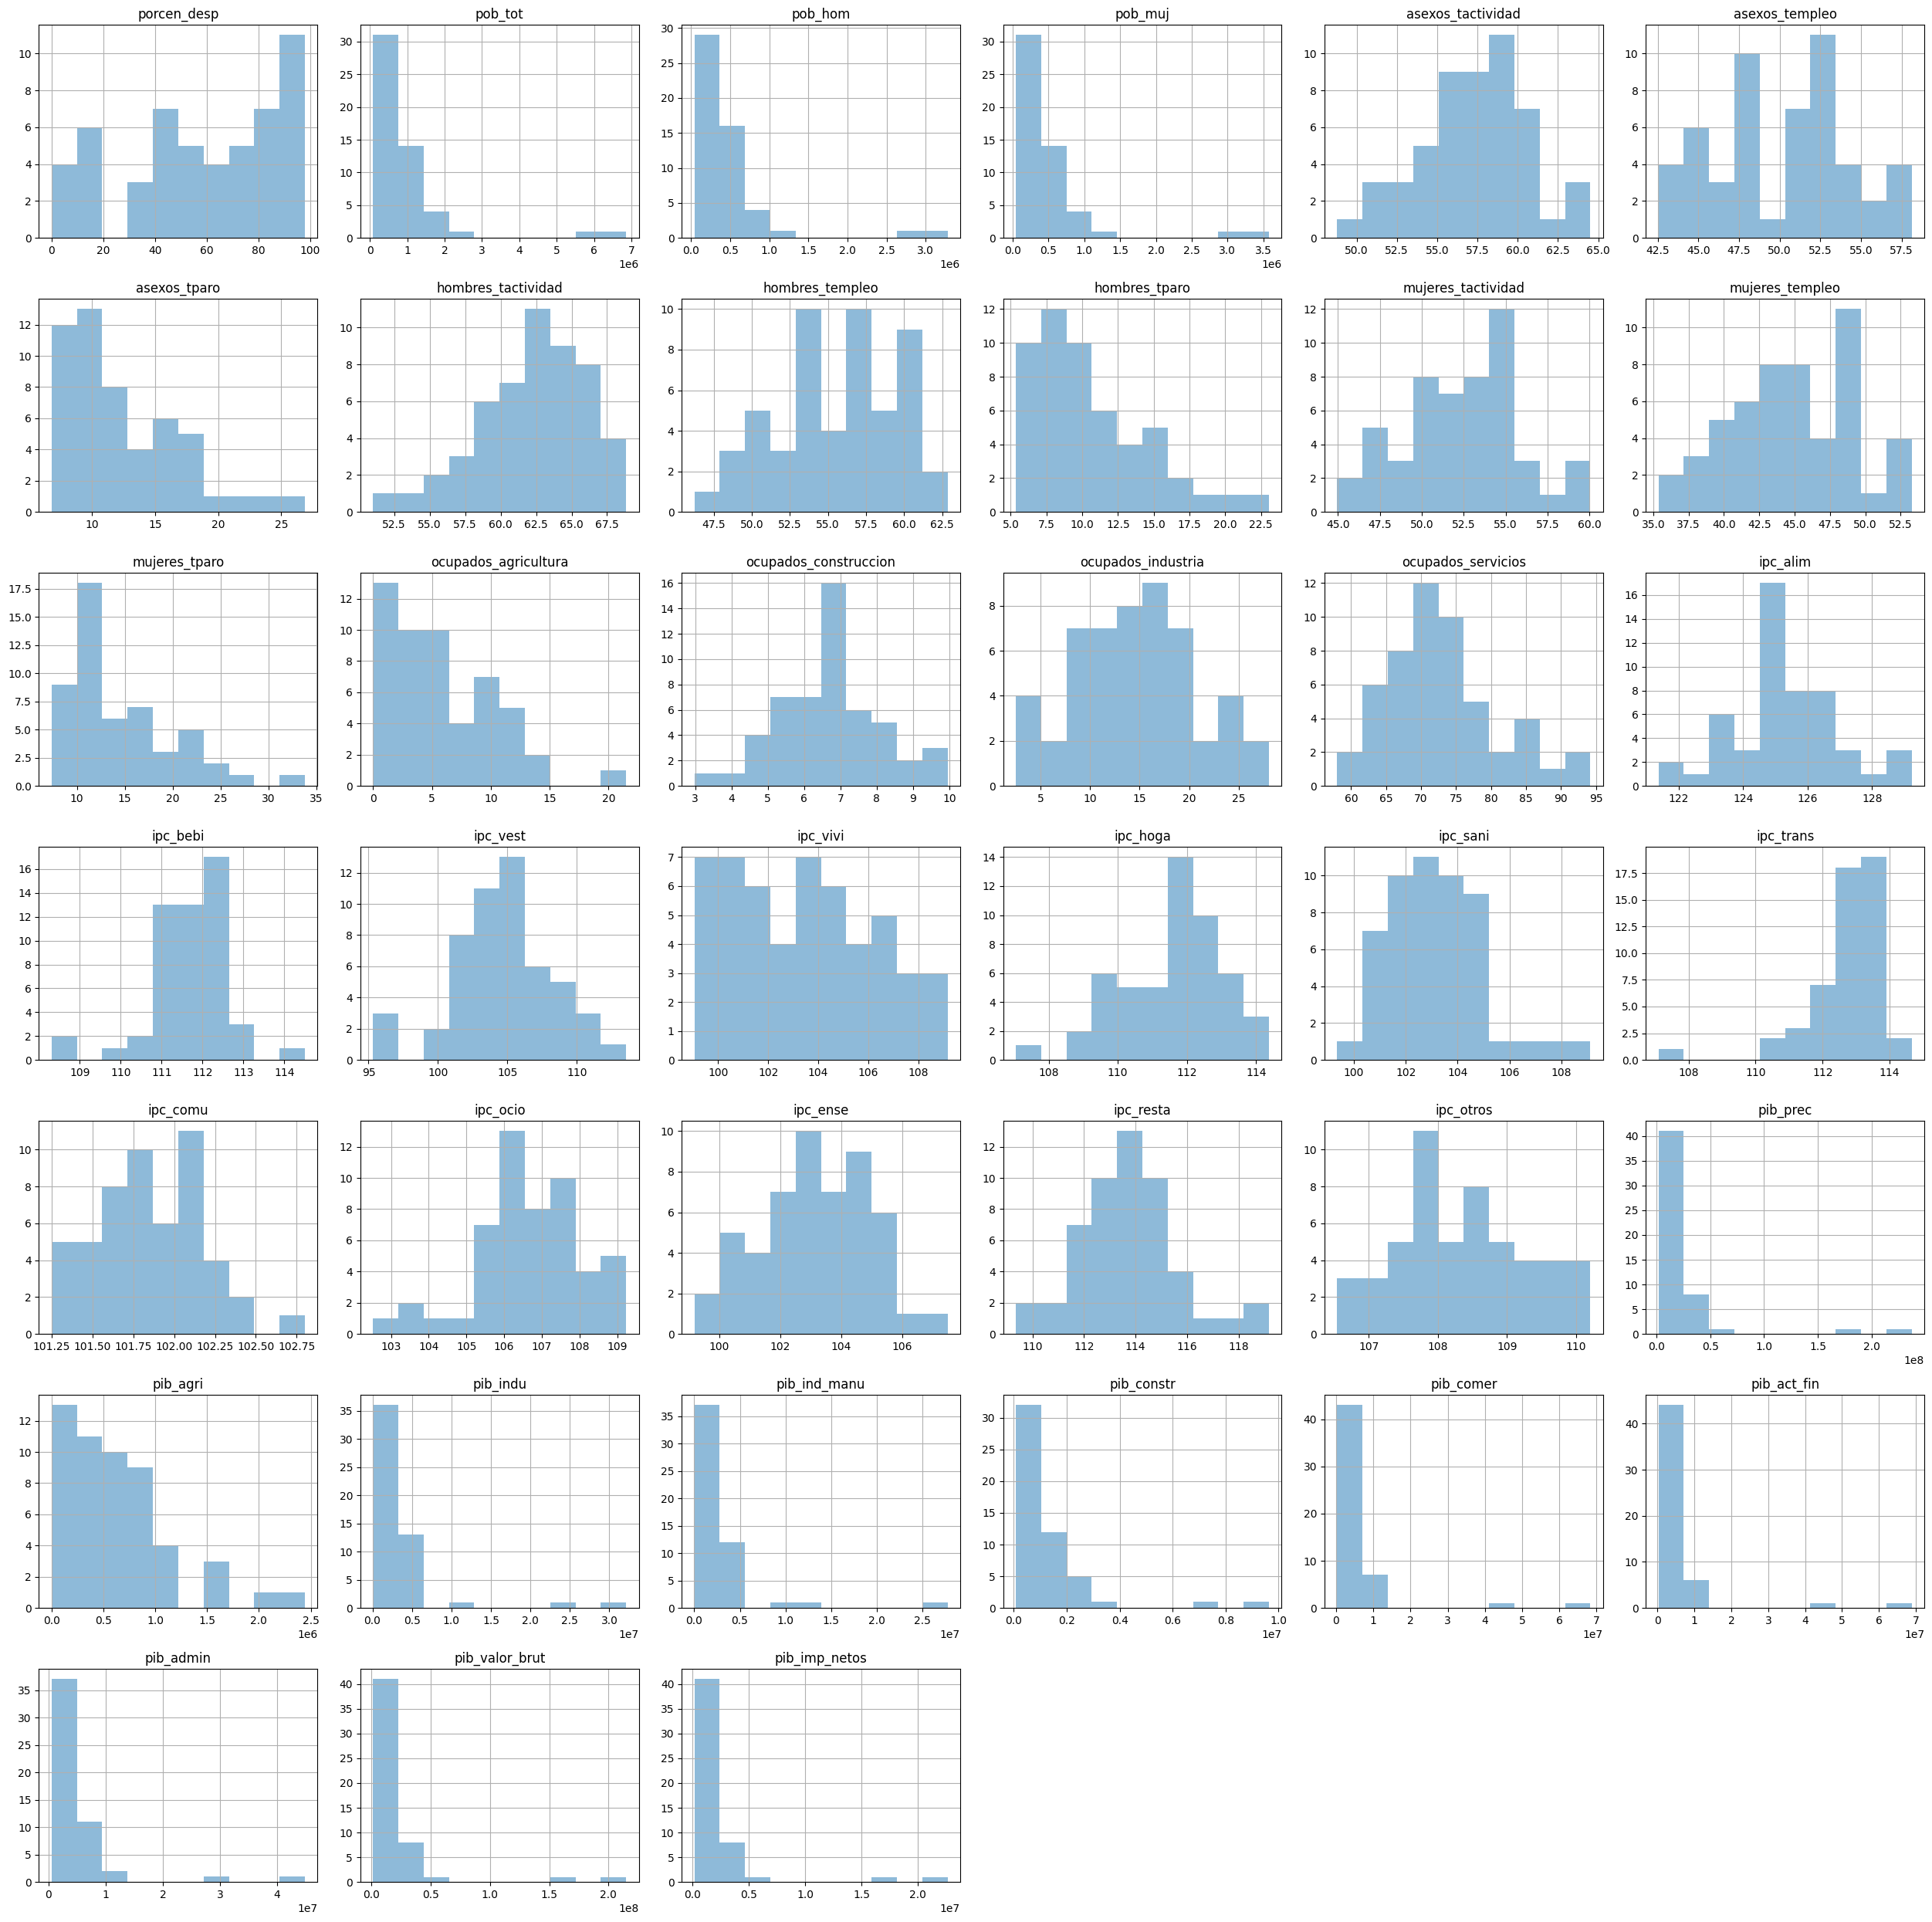

In [ ]:
df1.iloc[:, 2:41].hist(alpha=0.5, figsize=(25, 25))
plt.tight_layout()
plt.show()

In [ ]:
#print(df1.loc[df1["porcen_desp"] >= 90, "nom_prov"])
print(df1.loc[((df1["porcen_desp"] > 30) & (df1["porcen_desp"] < 40)), "nom_prov"])

7     Barcelona
13      Córdoba
27       Madrid
Name: nom_prov, dtype: object


In [ ]:
print(df1.loc[((df1["asexos_templeo"] > 50) & (df1["porcen_desp"] < 54)), "nom_prov"])

2      Alicante/Alacant
6        Balears, Illes
7             Barcelona
19             Gipuzkoa
27               Madrid
29               Murcia
34          Palmas, Las
38            Cantabria
45    Valencia/València
47              Bizkaia
Name: nom_prov, dtype: object


In [ ]:
# selecciono las columnas nom_prov y asexos_templeo
print(df1.iloc[:, [1, 7]])

                  nom_prov  asexos_templeo
0              Araba/Álava           54.36
1                 Albacete           51.98
2         Alicante/Alacant           50.70
3                  Almería           51.44
4                    Ávila           47.52
5                  Badajoz           47.25
6           Balears, Illes           57.10
7                Barcelona           56.66
8                   Burgos           53.08
9                  Cáceres           45.18
10                   Cádiz           42.82
11      Castellón/Castelló           48.36
12             Ciudad Real           46.50
13                 Córdoba           45.55
14               Coruña, A           48.76
15                  Cuenca           49.90
16                  Girona           55.26
17                 Granada           46.53
18             Guadalajara           58.12
19                Gipuzkoa           51.02
20                  Huelva           46.21
21                  Huesca           52.42
22         

In [ ]:
# selecciono las columnas nom_prov y ocupados_servicios - 68 al 73
print(df1.iloc[:, [1, 18]])
Ciudad Real               68.20
Toledo               70.03
Gipuzkoa               70.30
Cáceres               70.70
Huelva               70.73
Albacete               71.05
Murcia               71.22
Ávila               71.30
Zaragoza               71.42
Castellón/Castelló               71.58
Girona               71.97
Valladolid               73.02
Cantabria               73.62

                  nom_prov  ocupados_servicios
0              Araba/Álava               65.35
1                 Albacete               71.05
2         Alicante/Alacant               75.47
3                  Almería               65.57
4                    Ávila               71.30
5                  Badajoz               74.28
6           Balears, Illes               83.58
7                Barcelona               78.08
8                   Burgos               65.22
9                  Cáceres               70.70
10                   Cádiz               79.90
11      Castellón/Castelló               71.58
12             Ciudad Real               68.20
13                 Córdoba               74.08
14               Coruña, A               74.28
15                  Cuenca               62.45
16                  Girona               71.97
17                 Granada               78.03
18             Guadalajara               77.88
19                Gipuzkoa               70.30
20           

In [ ]:
print(df1.iloc[:, [1, 36]])

                  nom_prov  pib_comer
0              Araba/Álava    1946392
1                 Albacete    1559382
2         Alicante/Alacant    9851680
3                  Almería    3793774
4                    Ávila     645518
5                  Badajoz    2239124
6           Balears, Illes    8876564
7                Barcelona   42489644
8                   Burgos    1630774
9                  Cáceres    1230075
10                   Cádiz    4713925
11      Castellón/Castelló    2930316
12             Ciudad Real    2003563
13                 Córdoba    2674401
14               Coruña, A    6169564
15                  Cuenca     987352
16                  Girona    5538267
17                 Granada    3580557
18             Guadalajara     870770
19                Gipuzkoa    4963137
20                  Huelva    1793457
21                  Huesca    1275846
22                    Jaén    1900108
23                    León    2188755
24                  Lleida    3416722
25          

In [ ]:
print(df1.loc[((df1["pib_prec"] > 150000000)), "nom_prov"])

7     Barcelona
27       Madrid
Name: nom_prov, dtype: object


In [ ]:
print(df1.loc[((df1["pib_agri"] > 1500000)), "nom_prov"])

3     Almería
22       Jaén
29     Murcia
40    Sevilla
Name: nom_prov, dtype: object


In [ ]:
print(df1.loc[((df1["pib_indu"] > 20000000)), "nom_prov"])

7     Barcelona
27       Madrid
Name: nom_prov, dtype: object


In [ ]:
print(df1.loc[((df1["pib_ind_manu"] > 10000000)), "nom_prov"])

7     Barcelona
27       Madrid
Name: nom_prov, dtype: object


In [ ]:
print(df1.loc[((df1["pib_constr"] > 6000000)), "nom_prov"])

7     Barcelona
27       Madrid
Name: nom_prov, dtype: object


In [ ]:
print(df1.loc[((df1["pib_comer"] > 20000000)), "nom_prov"])

7     Barcelona
27       Madrid
Name: nom_prov, dtype: object


In [ ]:
print(df1.loc[((df1["pib_act_fin"] > 20000000)), "nom_prov"])

7     Barcelona
27       Madrid
Name: nom_prov, dtype: object


In [ ]:
print(df1.loc[((df1["pib_admin"] > 20000000)), "nom_prov"])

7     Barcelona
27       Madrid
Name: nom_prov, dtype: object


In [ ]:
print(df1.loc[((df1["pib_valor_brut"] > 100000000)), "nom_prov"])

7     Barcelona
27       Madrid
Name: nom_prov, dtype: object


In [ ]:
print(df1.loc[((df1["pib_imp_netos"] > 10000000)), "nom_prov"])

7     Barcelona
27       Madrid
Name: nom_prov, dtype: object


In [5]:
print(df1.iloc[:, [1, 2, 22]])
#Cáceres         87    100.06
#Araba/Álava     80    100.95
#Burgos          97    102.06
#Burgos          97    102.06
#Rioja, La       87    104.01
#Zamora          98    104.02
#Segovia         94    104.10
#Zaragoza        88    104.17
#Guadalajara     93    104.36
#Valladolid      88    105.14
#Huesca          93    105.47
#Palencia        94    105.91
#Salamanca       95    106.19
#Teruel          95    106.21
#Lleida          83    107.07
#Soria           96    107.98
#León            85    108.24
#Cuenca          93    108.72
#Ávila           94    109.17

#Sevilla         13     99.49
#Cádiz           13    100.28
#Ceuta            0    100.29
#Murcia          11    100.70
#Melilla          0    100.96
#Palmas, Las      8    101.14
#Balears, Illes  17    101.62
#Santa Cruz de Tenerife  11    102.35
#Coruña, A       16    103.36
#Pontevedra       7    104.43

                  nom_prov  porcen_desp  ipc_vivi
0              Araba/Álava           80    100.95
1                 Albacete           73    105.06
2         Alicante/Alacant           44     99.05
3                  Almería           62    101.34
4                    Ávila           94    109.17
5                  Badajoz           62     99.68
6           Balears, Illes           17    101.62
7                Barcelona           37    103.15
8                   Burgos           97    102.06
9                  Cáceres           87    100.06
10                   Cádiz           13    100.28
11      Castellón/Castelló           77    101.82
12             Ciudad Real           64    106.55
13                 Córdoba           32     99.20
14               Coruña, A           16    103.36
15                  Cuenca           93    108.72
16                  Girona           71    107.15
17                 Granada           58    102.55
18             Guadalajara           93    104.36


#  Introducción al Clustering

# Preproceso Básico

In [ ]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.1)


In [ ]:
import matplotlib.pyplot as plt
import numpy
import itertools
import seaborn as sns

## Carga de Datos

In [ ]:
# 0.1 load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving despob_pob_actividad_ocupados_ipc_pib_2023.csv to despob_pob_actividad_ocupados_ipc_pib_2023.csv
User uploaded file "despob_pob_actividad_ocupados_ipc_pib_2023.csv" with length 14593 bytes


Posteriormente utilizamos la librería [Pandas](https://pandas.pydata.org/) con el fin de poder manejar los datos en una estructura denominada DataFrame


In [ ]:
# 0.2 load data in DataFrame
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=";", index_col='nom_prov')

In [ ]:
df.head()

cod_prov  porcen_desp  pob_tot  pob_hom  pob_muj  \
nom_prov                                                             
Araba/Álava              1           80   336686   165743   170943   
Albacete                 2           73   387174   193676   193498   
Alicante/Alacant         3           44  1950357   963046   987311   
Almería                  4           62   753920   385180   368740   
Ávila                    5           94   158407    79551    78856   

                  asexos_tactividad  asexos_templeo  asexos_tparo  \
nom_prov                                                            
Araba/Álava                   58.33           54.36          6.80   
Albacete                      59.00           51.98         11.88   
Alicante/Alacant              58.41           50.70         13.22   
Almería                       61.16           51.44         15.87   
Ávila                         53.84           47.52         11.72   

                  hombres_tactividad  hombres_templeo  ...  pib_prec  \
nom_prov                                               ...             
Araba/Álava                    64.94            60.84  ...  12939983   
Albacete                       66.18            59.80  ...   8663814   
Alicante/Alacant               63.68            56.54  ...  37279735   
Almería                        67.63            57.62  ...  15659622   
Ávila                          60.37            53.97  ...   3300110   

                  pib_agri  pib_indu  pib_ind_manu  pib_constr  pib_comer  \
nom_prov                                                                    
Araba/Álava         201362   3832143       3473573      400677    1946392   
Albacete            884324   1397006       1018831      465911    1559382   
Alicante/Alacant    547312   3627964       2916222     2556047    9851680   
Almería            2443690   1348695       1020119      723957    3793774   
Ávila               141202    324441        251439      266759     645518   

                  pib_act_fin  pib_admin  pib_valor_brut  pib_imp_netos  
nom_prov                                                                 
Araba/Álava           2434844    2891885        11707303        1232680  
Albacete              1440261    2091603         7838487         825327  
Alicante/Alacant      8929332    8216082        33728417        3551318  
Almería               2816431    3041318        14167865        1491757  
Ávila                  678479     929338         2985737         314373  

[5 rows x 40 columns]

In [ ]:
df.drop(['cod_prov'], axis=1, inplace=True)

In [ ]:
df.shape

(52, 39)

In [ ]:
df.describe()

porcen_desp       pob_tot       pob_hom       pob_muj  \
count    52.000000  5.200000e+01  5.200000e+01  5.200000e+01   
mean     58.634615  9.363001e+05  4.585593e+05  4.777407e+05   
std      30.835445  1.224399e+06  5.910148e+05  6.335230e+05   
min       0.000000  8.303900e+04  4.189400e+04  4.114500e+04   
25%      39.250000  3.235895e+05  1.582725e+05  1.659918e+05   
50%      62.000000  6.120970e+05  3.031705e+05  3.089265e+05   
75%      87.250000  1.077199e+06  5.246972e+05  5.497360e+05   
max      98.000000  6.859914e+06  3.279823e+06  3.580091e+06   

       asexos_tactividad  asexos_templeo  asexos_tparo  hombres_tactividad  \
count          52.000000       52.000000     52.000000           52.000000   
mean           57.260962       50.130769     12.450000           62.259615   
std             3.454270        4.023081      4.626422            3.808595   
min            48.790000       42.540000      6.800000           51.010000   
25%            55.112500       47.070000      8.950000           60.175000   
50%            57.480000       50.735000     10.940000           62.740000   
75%            59.245000       52.915000     15.315000           64.865000   
max            64.510000       58.120000     26.870000           68.850000   

       hombres_templeo  hombres_tparo  ...      pib_prec      pib_agri  \
count        52.000000      52.000000  ...  5.200000e+01  5.200000e+01   
mean         55.615385      10.648462  ...  2.348291e+07  6.418846e+05   
std           4.055839       4.012314  ...  3.914822e+07  5.096847e+05   
min          46.230000       5.350000  ...  1.616543e+06  9.460000e+02   
25%          53.060000       7.682500  ...  7.368986e+06  2.458175e+05   
50%          56.150000       9.765000  ...  1.364045e+07  5.384490e+05   
75%          58.822500      13.100000  ...  2.362199e+07  8.850720e+05   
max          62.850000      23.060000  ...  2.375403e+08  2.443690e+06   

           pib_indu  pib_ind_manu    pib_constr     pib_comer   pib_act_fin  \
count  5.200000e+01  5.200000e+01  5.200000e+01  5.200000e+01  5.200000e+01   
mean   3.566173e+06  2.657481e+06  1.211115e+06  5.500885e+06  5.412133e+06   
std    5.409827e+06  4.274875e+06  1.653953e+06  1.078440e+07  1.088488e+07   
min    6.846600e+04  1.425200e+04  7.327700e+04  2.696910e+05  2.665410e+05   
25%    1.288374e+06  7.056848e+05  4.228638e+05  1.539129e+06  1.368584e+06   
50%    1.678171e+06  1.101476e+06  7.182195e+05  2.561484e+06  2.591884e+06   
75%    4.107865e+06  3.172188e+06  1.276512e+06  5.437046e+06  5.105543e+06   
max    3.213420e+07  2.776467e+07  9.638924e+06  6.831659e+07  6.886725e+07   

          pib_admin  pib_valor_brut  pib_imp_netos  
count  5.200000e+01    5.200000e+01   5.200000e+01  
mean   4.913702e+06    2.124589e+07   2.237013e+06  
std    7.282942e+06    3.541890e+07   3.729312e+06  
min    5.437040e+05    1.462549e+06   1.539940e+05  
25%    1.741752e+06    6.667007e+06   7.019795e+05  
50%    3.082594e+06    1.234105e+07   1.299408e+06  
75%    5.457034e+06    2.137173e+07   2.250263e+06  
max    4.483520e+07    2.149119e+08   2.262841e+07  

[8 rows x 39 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Araba/Álava to Melilla
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   porcen_desp            52 non-null     int64  
 1   pob_tot                52 non-null     int64  
 2   pob_hom                52 non-null     int64  
 3   pob_muj                52 non-null     int64  
 4   asexos_tactividad      52 non-null     float64
 5   asexos_templeo         52 non-null     float64
 6   asexos_tparo           52 non-null     float64
 7   hombres_tactividad     52 non-null     float64
 8   hombres_templeo        52 non-null     float64
 9   hombres_tparo          52 non-null     float64
 10  mujeres_tactividad     52 non-null     float64
 11  mujeres_templeo        52 non-null     float64
 12  mujeres_tparo          52 non-null     float64
 13  ocupados_agricultura   52 non-null     float64
 14  ocupados_construccion  52 non-null     float64
 15

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MaxAbsScaler()
datanorm = min_max_scaler.fit_transform(df)

datanorm.min(axis=0)

array([0.00000000e+00, 1.21049622e-02, 1.27732503e-02, 1.14927246e-02,
       7.56316850e-01, 7.31933930e-01, 2.53070339e-01, 7.40885984e-01,
       7.35560859e-01, 2.32003469e-01, 7.48418248e-01, 6.63851351e-01,
       2.17687075e-01, 0.00000000e+00, 2.99497487e-01, 8.91265597e-02,
       6.15711253e-01, 9.39255591e-01, 9.45938865e-01, 8.39380063e-01,
       9.07300540e-01, 9.35997202e-01, 9.10465543e-01, 9.34065934e-01,
       9.84922179e-01, 9.38484072e-01, 9.22776330e-01, 9.17519718e-01,
       9.66699936e-01, 6.80534231e-03, 3.87119479e-04, 2.13062751e-03,
       5.13314186e-04, 7.60219709e-03, 3.94766501e-03, 3.87035911e-03,
       1.21267224e-02, 6.80534270e-03, 6.80533865e-03])

In [ ]:
cn= df.columns.tolist()
df_norm = pd.DataFrame(datanorm, columns=cn)
df_norm.head()

porcen_desp   pob_tot   pob_hom   pob_muj  asexos_tactividad  \
0     0.816327  0.049080  0.050534  0.047748           0.904201   
1     0.744898  0.056440  0.059051  0.054048           0.914587   
2     0.448980  0.284312  0.293627  0.275778           0.905441   
3     0.632653  0.109902  0.117439  0.102997           0.948070   
4     0.959184  0.023092  0.024255  0.022026           0.834599   

   asexos_templeo  asexos_tparo  hombres_tactividad  hombres_templeo  \
0        0.935306      0.253070            0.943210         0.968019   
1        0.894357      0.442129            0.961220         0.951472   
2        0.872333      0.491999            0.924909         0.899602   
3        0.885065      0.590622            0.982280         0.916786   
4        0.817619      0.436174            0.876834         0.858711   

   hombres_tparo  ...  pib_prec  pib_agri  pib_indu  pib_ind_manu  pib_constr  \
0       0.273200  ...  0.054475  0.082401  0.119254      0.125108    0.041569   
1       0.417606  ...  0.036473  0.361881  0.043474      0.036695    0.048336   
2       0.486990  ...  0.156941  0.223969  0.112900      0.105034    0.265180   
3       0.640069  ...  0.065924  1.000000  0.041971      0.036742    0.075108   
4       0.458803  ...  0.013893  0.057782  0.010096      0.009056    0.027675   

   pib_comer  pib_act_fin  pib_admin  pib_valor_brut  pib_imp_netos  
0   0.028491     0.035356   0.064500        0.054475       0.054475  
1   0.022826     0.020914   0.046651        0.036473       0.036473  
2   0.144206     0.129660   0.183251        0.156941       0.156941  
3   0.055532     0.040897   0.067833        0.065924       0.065924  
4   0.009449     0.009852   0.020728        0.013893       0.013893  

[5 rows x 39 columns]

# Análisis de Componentes Principales

El análisis de componentes principales (en español ACP, en inglés, PCA) es una técnica utilizada para reducir la dimensionalidad de un conjunto de datos. Intuitivamente la técnica sirve para hallar las causas de la variabilidad de un conjunto de datos y ordenarlas por importancia. Técnicamente, PCA busca la proyección según la cual los datos queden mejor representados en términos de mínimos cuadrados. PCA se emplea sobre todo en análisis exploratorio de datos y para construir modelos predictivos.

PCA comporta el cálculo de la descomposición en autovalores de la matriz de covarianza, normalmente tras centrar los datos en la media de cada atributo.
Para ello utilizaremos el procedimiento [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) de scikitlearn

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
nombre_provincia = scaler.fit_transform(df)

Una de las ventajas del PCA para reducir la dimensionalidad de un grupo de datos, es que retiene aquellas características del conjunto de datos que contribuyen más a su varianza, manteniendo un orden de bajo nivel de los componentes principales e ignorando los de alto nivel.

El objetivo es que esos componentes de bajo orden a veces contienen el aspecto “más importante” de esa información

In [ ]:
#2. PCA Estimation
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(nombre_provincia)
X_pca

array([[ 0.2566687 , -3.72483598],
       [-0.97015638, -0.80813447],
       [ 1.65454103,  0.7853431 ],
       [-0.61395326,  1.29915813],
       [-2.75592573, -0.734456  ],
       [-1.37200544,  3.5198083 ],
       [ 2.60317355, -0.83737995],
       [14.8225116 , -0.04667067],
       [-0.78641902, -2.66028095],
       [-2.5035537 ,  1.76400137],
       [-1.11684584,  5.12368165],
       [-1.12538677,  0.11445005],
       [-2.33881634,  1.13634926],
       [-1.66194043,  3.12110055],
       [ 0.10429763, -0.28641514],
       [-2.44499548, -1.35390834],
       [ 1.05250541, -2.9509505 ],
       [-1.18795651,  3.2187962 ],
       [ 0.24943015, -2.57047144],
       [ 0.77982403, -2.16325346],
       [-1.99038441,  2.60178532],
       [-1.57751214, -2.45290061],
       [-2.96496297,  3.45693384],
       [-2.57793635, -0.23752291],
       [-0.11521899, -3.42360195],
       [-0.38914497, -3.87612809],
       [-2.02447996, -1.45731922],
       [18.27345788,  2.35552885],
       [ 0.61554345,

A continuación, se muestra el porcentaje de varianza explicado por cada uno de los componentes seleccionados.

En PCA cada componente principal tiene una cierta desviación, que en conjunto suman hasta el 100% de la desviación total.

Para cada componente principal, un cociente de su varianza con respecto a la varianza total se denomina "proporción de varianza explicada".

In [ ]:
print(estimator.explained_variance_ratio_)

[0.35373805 0.17218346]


In [ ]:
pd.DataFrame(numpy.matrix.transpose(estimator.components_), columns=['PC-1', 'PC-2'], index=df.columns)

PC-1      PC-2
porcen_desp           -0.069907 -0.263380
pob_tot                0.256123  0.087109
pob_hom                0.255995  0.087356
pob_muj                0.256186  0.086859
asexos_tactividad      0.146780 -0.032355
asexos_templeo         0.151818 -0.258934
asexos_tparo          -0.059217  0.352331
hombres_tactividad     0.119099 -0.000177
hombres_templeo        0.132222 -0.221776
hombres_tparo         -0.049422  0.355788
mujeres_tactividad     0.164165 -0.058516
mujeres_templeo        0.158020 -0.261820
mujeres_tparo         -0.066814  0.334205
ocupados_agricultura  -0.113218 -0.023981
ocupados_construccion -0.046211 -0.096942
ocupados_industria    -0.002623 -0.311229
ocupados_servicios     0.076224  0.272631
ipc_alim              -0.099514  0.186678
ipc_bebi              -0.009290  0.078469
ipc_vest               0.021952 -0.093080
ipc_vivi              -0.045004 -0.238316
ipc_hoga               0.015772 -0.060286
ipc_sani              -0.001775 -0.020469
ipc_trans             -0.170349 -0.004392
ipc_comu              -0.016380  0.045892
ipc_ocio               0.105136 -0.141182
ipc_ense               0.020037  0.066476
ipc_resta             -0.015886  0.053993
ipc_otros              0.023621 -0.055357
pib_prec               0.260552  0.052083
pib_agri              -0.004831  0.097614
pib_indu               0.247997  0.004008
pib_ind_manu           0.229266 -0.016989
pib_constr             0.260069  0.057689
pib_comer              0.257429  0.053826
pib_act_fin            0.257188  0.053475
pib_admin              0.258616  0.070759
pib_valor_brut         0.260552  0.052083
pib_imp_netos          0.260552  0.052083

Finalmente, PCA encuentra un nuevo sistema de coordenadas en el que cada punto tiene un nuevo valor (x,y). Los ejes no significan realmente nada físico; se eligen para dar a uno de ellos la mejor de las variaciones.

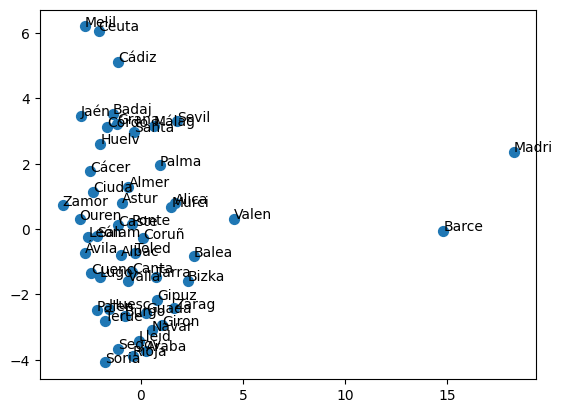

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:,0], X_pca[:,1] ,s=50)
# anotación
for i in range(0,len(X_pca)):
    ax.annotate(df.iloc[i,:].name[0:5], (X_pca[i,0], X_pca[i,1]))

# Clustering Jerárquico


Los algoritmos de clustering jerárquico se distinguen por generar como resultado una estructura de
grupos organizada en forma de árbol jerárquico. Este árbol, denominado dendrograma es un fiel reflejo de como los clusters se relacionan unos con otros. Dentro de la estructura, el nodo superior o “raíz” del árbol engloba la totalidad de los elementos de la colección, mientras que
los nodos “hoja” representan a los grupos de elementos con similitud máxima. Cada nivel intermedio
puede ser visto como la combinación de dos agrupaciones del nivel más bajo, o bien, como una parte
de la división de la agrupación de nivel más alto.



A continuación, ejecutemos un algoritmo de clustering jerárquico con el fin de observar como se pueden están organizados los elementos que están bajo estudio.

En primer lugar vamos a calcular la matriz de similitud entre los diferentes elementos utilizando para ello la [distancia euclídea](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) y la visualizamos utilizando la librería seaborn y el [gráfico de calor](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


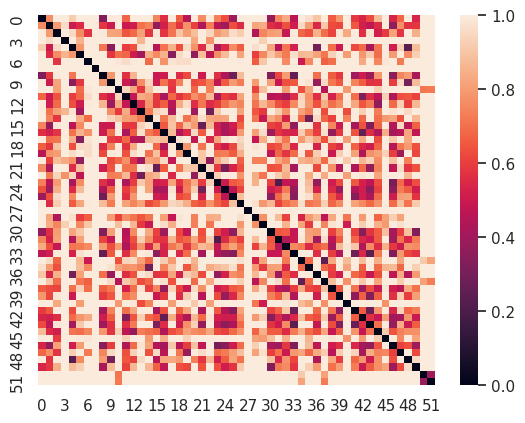

In [ ]:
#Clustering jerárquico
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(datanorm)

import seaborn as sns; sns.set()
ax = sns.heatmap(matsim,vmin=0, vmax=1)

Una vez calculada la matriz de similitud pasamos a construir el dendrograma. Para ello hay que decidir que tipo de [distancia intercluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) utilizamos, lo cual dependerá del problema que tengamos que afrontar. En un extremo estará el enlace simple que permitirá manejar fácilmente elementos especiales (*outliers*) y clusters de muy diversa forma, pero que nos ofrecerá grupos poco balanceados. En el otro extremo el enlace completo nos ofrecerá agrupaciones más equlibradas pero que supondrán la división de grupos mayoritarios. De forma intermedia tendremos otros índices como Ward o Average
para ver cómo se distribuyen los datos.


<ipython-input-25-82dba9430955>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matsim, method = 'ward')


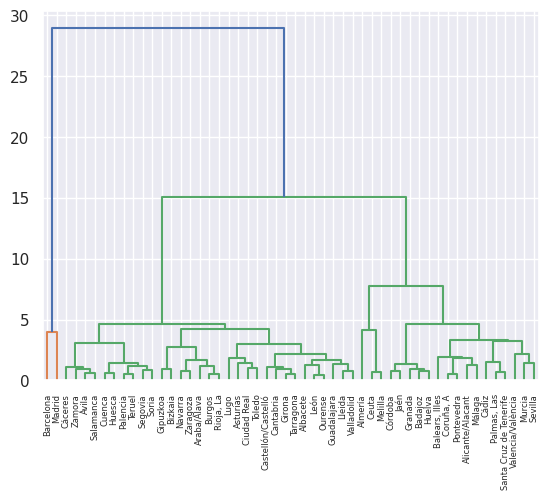

<Figure size 640x480 with 0 Axes>

In [ ]:
# Dendograma
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'ward')
cluster.hierarchy.dendrogram(clusters, labels = df.index)

f = plt.figure()
plt.show()

Aunque aquí el corte más que lineal tendría que hacerse ad-hoc, es decir, a partir de un corte con más granularidad (más grupos) deberíamos entonces reagrupar clusters que sean muy similares entre sí.

Con un corte en 5 se obtienen 4 clusters, y un coeficiente de Silhouette de 0.316

In [ ]:
cut = 5
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([2, 2, 4, 3, 2, 4, 4, 1, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 1, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 3, 3], dtype=int32)

Una vez terminado el clustering podemos aplicar ciertas métricas de calidad del mismo como el [coeficiente Silohuette] (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)



In [ ]:
# tratamos el cluster -1 como cluster de outliers
from sklearn import metrics
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, labels))

Estimated number of clusters: 4
Silhouette Coefficient: 0.316


Y podríamos comenzar con la caracterízación de los grupos, en primer lugar visualizandolos utilizando la proyección PCA

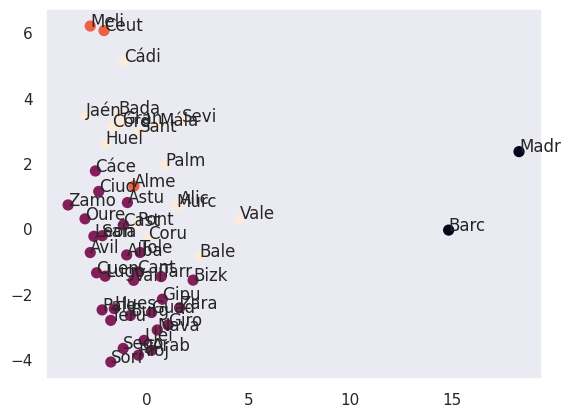

In [ ]:
#plotting orginal points with color related to label
fig, ax = plt.subplots()
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(0,len(X_pca)):
    ax.annotate(df.iloc[i,:].name[0:4], (X_pca[i,0], X_pca[i,1]))
plt.grid()
plt.show()

Y luego obteniendo estadísticos básicos que nos permitan interpretar que significa cada grupo

In [ ]:
df['group'] = labels

<Axes: xlabel='group'>

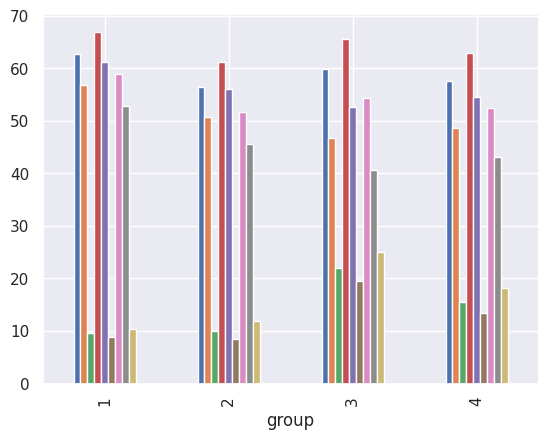

In [ ]:
res = df[['asexos_tactividad', 'asexos_templeo', 'asexos_tparo', 'hombres_tactividad','hombres_templeo', 'hombres_tparo', 'mujeres_tactividad', 'mujeres_templeo', 'mujeres_tparo','group']].groupby(('group')).mean()
res.plot(kind='bar', legend=False)

<Axes: xlabel='group'>

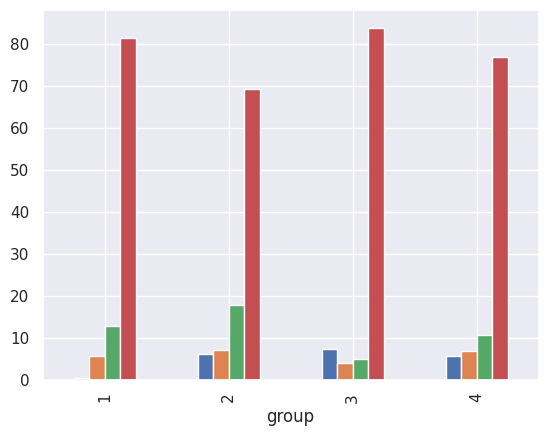

In [ ]:
res = df[['ocupados_agricultura', 'ocupados_construccion', 'ocupados_industria', 'ocupados_servicios','group']].groupby(('group')).mean()
res.plot(kind='bar', legend=False)

<Axes: xlabel='group'>

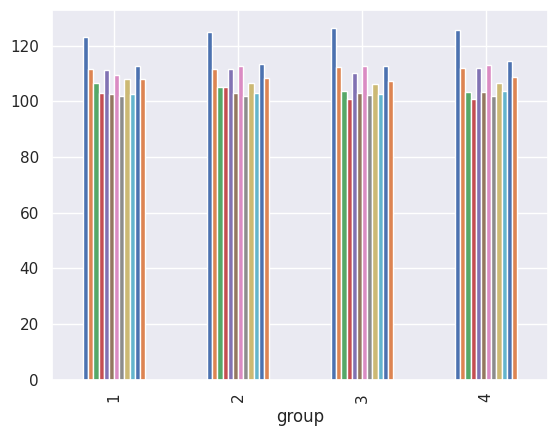

In [ ]:
res = df[['ipc_alim', 'ipc_bebi', 'ipc_vest', 'ipc_vivi', 'ipc_hoga', 'ipc_sani', 'ipc_trans', 'ipc_comu', 'ipc_ocio', 'ipc_ense', 'ipc_resta', 'ipc_otros','group']].groupby(('group')).mean()
res.plot(kind='bar', legend=False)

<Axes: xlabel='group'>

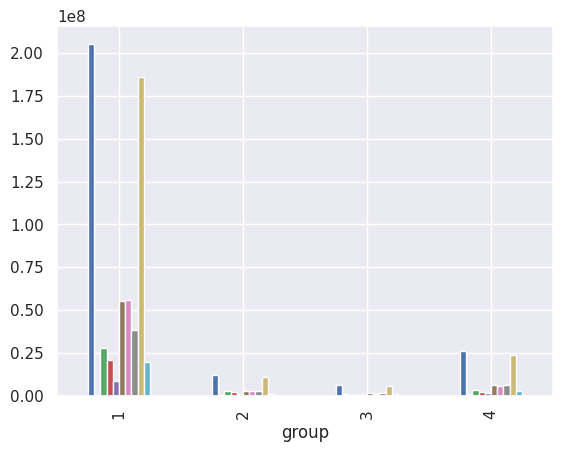

In [ ]:
res = df[['pib_prec', 'pib_agri', 'pib_indu', 'pib_ind_manu', 'pib_constr', 'pib_comer', 'pib_act_fin', 'pib_admin', 'pib_valor_brut', 'pib_imp_netos','group']].groupby(('group')).mean()
res.plot(kind='bar', legend=False)

Conclusiones.

El group 2 contiene provincias con altas tasas de despoblamiento. El grupo 2 tiene:

* menos **hombres_tactividad** y **mujeres_tactividad**

* mas **ocupados_industria** y menos **ocupados_servicios**

* mas **ipc_vivi**

* en general tiene menos de todos los pib. Menos pib_prec, pib_constr, pib_comer, pib_act_fin, pib_admin, pib_valor_brut. Destaco **pib_prec**, **pib_valor_brut** que representan mayor aporte.

Y podemos utilizar filtros para saber que provincias pertenecen a cada grupo

In [ ]:
df[df['group'] == 1]

porcen_desp  pob_tot  pob_hom  pob_muj  asexos_tactividad  \
nom_prov                                                               
Barcelona           37  5805500  2833196  2972304              62.17   
Madrid              36  6859914  3279823  3580091              63.41   

           asexos_templeo  asexos_tparo  hombres_tactividad  hombres_templeo  \
nom_prov                                                                       
Barcelona           56.66          8.86               66.25            60.46   
Madrid              56.94         10.20               67.83            61.84   

           hombres_tparo  ...  pib_agri  pib_indu  pib_ind_manu  pib_constr  \
nom_prov                  ...                                                 
Barcelona           8.74  ...    723577  32134195      27764672     7393843   
Madrid              8.84  ...    162499  23091420      13175614     9638924   

           pib_comer  pib_act_fin  pib_admin  pib_valor_brut  pib_imp_netos  \
nom_prov                                                                      
Barcelona   42489644     42975113   31456531       157172903       16548982   
Madrid      68316587     68867253   44835198       214911881       22628411   

           group  
nom_prov          
Barcelona      1  
Madrid         1  

[2 rows x 40 columns]

In [ ]:
df[df['group'] == 2]

porcen_desp  pob_tot  pob_hom  pob_muj  asexos_tactividad  \
nom_prov                                                                        
Araba/Álava                  80   336686   165743   170943              58.33   
Albacete                     73   387174   193676   193498              59.00   
Ávila                        94   158407    79551    78856              53.84   
Burgos                       97   357180   178376   178804              57.59   
Cáceres                      87   387434   191581   195853              53.26   
Castellón/Castelló           77   603952   299475   304477              56.28   
Ciudad Real                  64   491127   243218   247909              55.52   
Cuenca                       93   197139    99137    98002              56.30   
Girona                       71   809266   404640   404626              61.12   
Guadalajara                  93   274598   139118   135480              64.51   
Gipuzkoa                     48   728027   355363   372664              55.09   
Huesca                       93   227077   114995   112082              57.16   
León                         85   447463   217348   230115              50.56   
Lleida                       83   446793   228115   218678              59.16   
Rioja, La                    87   322490   159142   163348              59.32   
Lugo                         43   323956   157083   166873              52.50   
Navarra                      77   671746   332086   339660              59.05   
Ourense                      75   304550   146180   158370              48.79   
Asturias                     50  1005283   479064   526219              50.66   
Palencia                     94   157752    78063    79689              55.27   
Salamanca                    95   327170   158669   168501              54.24   
Cantabria                    52   588419   284880   303539              55.01   
Segovia                      94   155258    77773    77485              59.92   
Soria                        96    89482    45362    44120              57.37   
Tarragona                    66   847566   422935   424631              58.94   
Teruel                       95   135237    68460    66777              57.19   
Toledo                       57   728496   366012   362484              60.44   
Valladolid                   88   521071   253443   267628              55.78   
Bizkaia                      52  1154306   557537   596769              57.37   
Zamora                       98   166366    82418    83948              51.49   
Zaragoza                     88   977413   477911   499502              59.22   

                    asexos_templeo  asexos_tparo  hombres_tactividad  \
nom_prov                                                               
Araba/Álava                  54.36          6.80               64.94   
Albacete                     51.98         11.88               66.18   
Ávila                        47.52         11.72               60.37   
Burgos                       53.08          7.82               62.06   
Cáceres                      45.18         15.13               58.63   
Castellón/Castelló           48.36         14.06               60.33   
Ciudad Real                  46.50         16.26               62.33   
Cuenca                       49.90         11.39               62.16   
Girona                       55.26          9.59               66.26   
Guadalajara                  58.12          9.90               68.85   
Gipuzkoa                     51.02          7.38               57.26   
Huesca                       52.42          8.28               62.99   
León                         45.38         10.26               54.69   
Lleida                       54.81          7.36               64.84   
Rioja, La                    53.89          9.16               64.15   
Lugo                         48.07          8.43               54.78   
Navarra                      53.22          9.88  

In [ ]:
df[df['group'] == 3]

porcen_desp  pob_tot  pob_hom  pob_muj  asexos_tactividad  \
nom_prov                                                              
Almería            62   753920   385180   368740              61.16   
Ceuta               0    83039    41894    41145              61.31   
Melilla             0    85491    43047    42444              57.29   

          asexos_templeo  asexos_tparo  hombres_tactividad  hombres_templeo  \
nom_prov                                                                      
Almería            51.44         15.87               67.63            57.62   
Ceuta              44.84         26.87               66.11            52.27   
Melilla            43.85         23.45               62.83            48.33   

          hombres_tparo  ...  pib_agri  pib_indu  pib_ind_manu  pib_constr  \
nom_prov                 ...                                                 
Almería           14.76  ...   2443690   1348695       1020119      723957   
Ceuta             20.94  ...      1748     96752         22099       73384   
Melilla           23.06  ...       946     68466         14252       73277   

          pib_comer  pib_act_fin  pib_admin  pib_valor_brut  pib_imp_netos  \
nom_prov                                                                     
Almería     3793774      2816431    3041318        14167865        1491757   
Ceuta        315553       268574     840997         1597008         168151   
Melilla      269691       266541     783628         1462549         153994   

          group  
nom_prov         
Almería       3  
Ceuta         3  
Melilla       3  

[3 rows x 40 columns]

In [ ]:
df[df['group'] == 4]

porcen_desp  pob_tot  pob_hom  pob_muj  \
nom_prov                                                         
Alicante/Alacant                 44  1950357   963046   987311   
Badajoz                          62  1330178   656840   673338   
Balears, Illes                   17  1197261   595216   602045   
Cádiz                            13  1250539   615598   634941   
Córdoba                          32   773997   378791   395206   
Coruña, A                        16  1123426   538177   585249   
Granada                          58   930181   457842   472339   
Huelva                           45   530824   263492   267332   
Jaén                             40   620242   306866   313376   
Málaga                           44  1751600   855899   895701   
Murcia                           11  1552457   777668   774789   
Palmas, Las                       8  1140258   566072   574186   
Pontevedra                        7   944245   455309   488936   
Santa Cruz de Tenerife           11  1061790   520204   541586   
Sevilla                          13  1957210   954887  1002323   
Valencia/València                48  2656291  1298685  1357606   

                        asexos_tactividad  asexos_templeo  asexos_tparo  \
nom_prov                                                                  
Alicante/Alacant                    58.41           50.70         13.22   
Badajoz                             57.99           47.25         18.52   
Balears, Illes                      63.77           57.10         10.60   
Cádiz                               55.12           42.82         22.31   
Córdoba                             55.70           45.55         18.23   
Coruña, A                           53.64           48.76          9.11   
Granada                             58.41           46.53         20.32   
Huelva                              56.60           46.21         18.38   
Jaén                                52.09           42.54         18.31   
Málaga                              58.22           48.50         16.69   
Murcia                              59.67           52.12         12.64   
Palmas, Las                         61.16           52.02         14.95   
Pontevedra                          54.37           48.44         10.90   
Santa Cruz de Tenerife              58.18           48.26         17.07   
Sevilla                             58.28           48.58         16.64   
Valencia/València                   60.34           53.19         11.85   

                        hombres_tactividad  hombres_templeo  hombres_tparo  \
nom_prov                                                                     
Alicante/Alacant                     63.68            56.54          11.23   
Badajoz                              64.30            54.62          15.03   
Balears, Illes                       67.94            61.09          10.18   
Cádiz                                60.71            49.21          18.93   
Córdoba                              63.18            54.15          14.30   
Coruña, A                            57.68            52.94           8.22   
Granada                              63.96            53.10          17.00   
Huelva                               61.27            51.48          15.97   
Jaén                                 59.39            49.86          15.99   
Málaga                               62.65            53.87          14.02   
Murcia                               65.95            58.74          10.93   
Palmas, Las                          65.57            56.66          13.58   
Pontevedra                           59.59            53.66           9.94   
Santa Cruz de Tenerife               63.21            53.95          14.68   
Sevilla                              62.55            53.72          14.11   
Valencia/València                    65.64            59.07          10.01   

                        ...  pib_agri  pib_indu  pib_ind_manu  pib_constr  \
no

Para finalizar buscamos una visualización un poco especial con [seaborn.clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

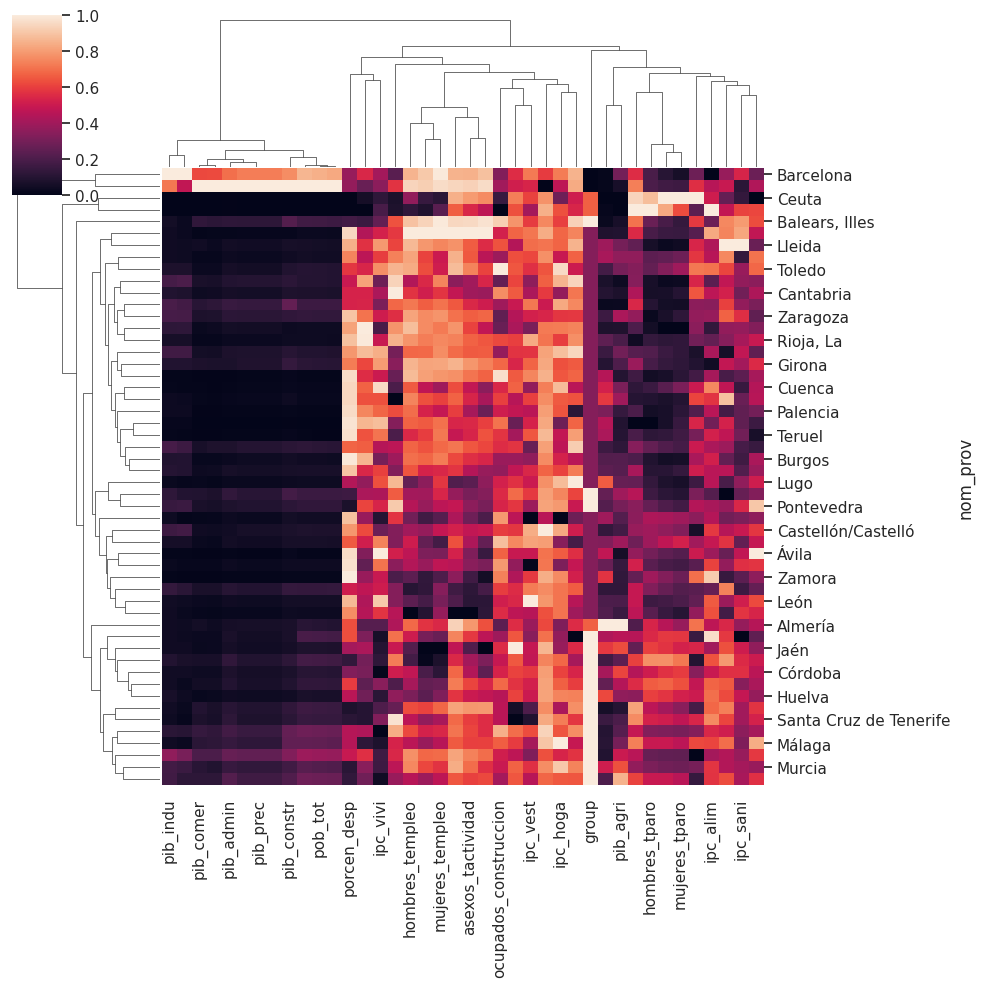

In [ ]:
sns.set(color_codes=True)
sns.clustermap(df, standard_scale=1)

# K-means

The k-means algorithm is based on the idea that a central point (centroid) can represent a cluster. Normally this point is the mean or median of a group of points (may not be an element of the whole to be analyzed). The k-means algorithm establishes a distance between the elements by selecting a predefined number of centroids.

K-means uses these pre-selected centroids as "seeds" in the process of building the clusters. To do this, a cluster is assigned to each centroid, in an iterative process. The cluster assigned to each centroid is the closest to it, and the distance is measured between the element to be included and the mean value for all the clusters. As mentioned above, the goal of the k- means algorithm process is to minimize an error function or distance, for example, the sum of squared errors.



### Parametrization



En primer lugar vamos a establecer los parámetros que vamos a considerar por defecto

In [ ]:
# parameters
init = 'random' # initialization method

# to run 10 times with different random centroids
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300

# controls the tolerance with regard to the changes in the
# within-cluster sum-squared-error to declare convergence

tol = 1e-04

 # random seed
random_state = 0

Vamos a elegir K dependiendo de los valores que tome el clustering en cuanto a Distorsión (SSE) y Silhouette desde k = 2 a k = 11

*En este caso además vamos a optar por hacer el clustering sobre los datos proyectados mediante PCA*

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(n_clusters=i, init=init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

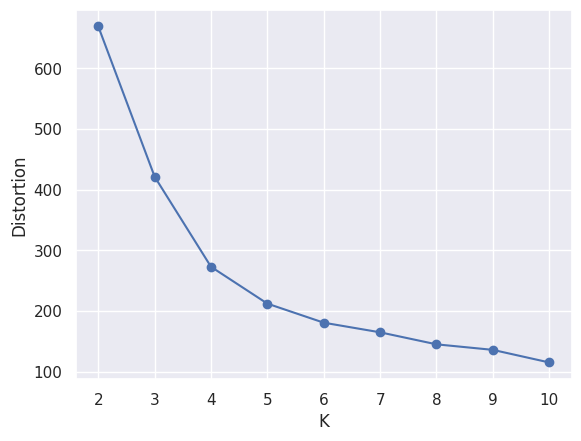

In [ ]:
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

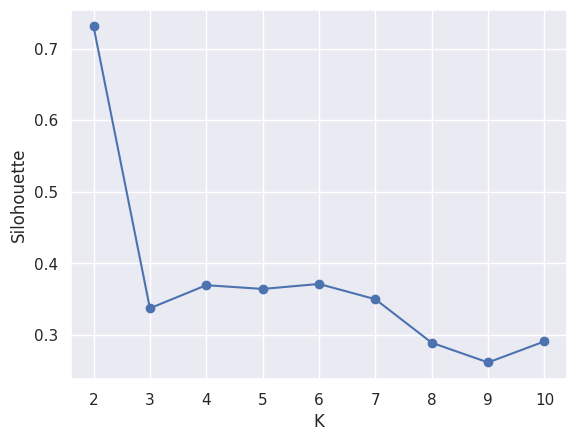

In [ ]:
plt.plot(range(2,11), silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.show()

### Ejecución del Algoritmo

Vamos a seleccionar k = 4 con el fin de ejecutar el clustering

In [ ]:
k = 5
km = km = KMeans(n_clusters=k, init=init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
#KMeans(k, init, n_init = iterations , max_iter= max_iter, tol = tol, random_state = random_state)
y_km = km.fit_predict(X_pca)

Vamos a calcular los valores finales de las métricas del algoritmo

In [ ]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, y_km))

print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.141
Distortion: 212.32


Y vamos a visualizar los resultados


In [ ]:
km.labels_

array([3, 3, 0, 0, 2, 1, 0, 4, 3, 2, 1, 2, 2, 1, 2, 2, 3, 1, 3, 3, 1, 3,
       1, 2, 3, 3, 2, 4, 0, 0, 3, 2, 2, 2, 0, 2, 2, 1, 3, 3, 0, 3, 3, 3,
       3, 0, 3, 3, 2, 3, 1, 1], dtype=int32)

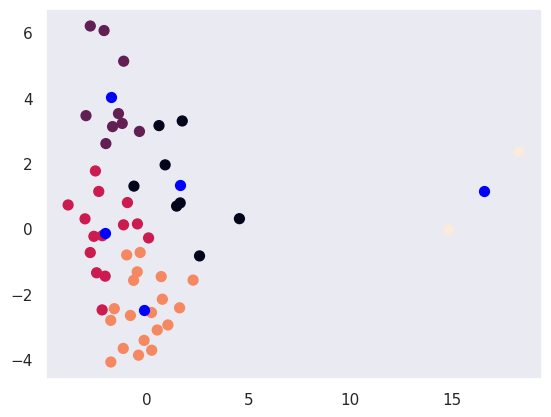

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=km.labels_,s=50)
# plotting centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='blue',s=50)
#
plt.grid()
plt.show()


In [ ]:
df['kmeans_group'] = km.labels_

In [ ]:
df[df['kmeans_group'] == 0]

porcen_desp  pob_tot  pob_hom  pob_muj  asexos_tactividad  \
nom_prov                                                                       
Alicante/Alacant            44  1950357   963046   987311              58.41   
Almería                     62   753920   385180   368740              61.16   
Balears, Illes              17  1197261   595216   602045              63.77   
Málaga                      44  1751600   855899   895701              58.22   
Murcia                      11  1552457   777668   774789              59.67   
Palmas, Las                  8  1140258   566072   574186              61.16   
Sevilla                     13  1957210   954887  1002323              58.28   
Valencia/València           48  2656291  1298685  1357606              60.34   

                   asexos_templeo  asexos_tparo  hombres_tactividad  \
nom_prov                                                              
Alicante/Alacant            50.70         13.22               63.68   
Almería                     51.44         15.87               67.63   
Balears, Illes              57.10         10.60               67.94   
Málaga                      48.50         16.69               62.65   
Murcia                      52.12         12.64               65.95   
Palmas, Las                 52.02         14.95               65.57   
Sevilla                     48.58         16.64               62.55   
Valencia/València           53.19         11.85               65.64   

                   hombres_templeo  hombres_tparo  ...  pib_indu  \
nom_prov                                           ...             
Alicante/Alacant             56.54          11.23  ...   3627964   
Almería                      57.62          14.76  ...   1348695   
Balears, Illes               61.09          10.18  ...   1806386   
Málaga                       53.87          14.02  ...   1399899   
Murcia                       58.74          10.93  ...   5608933   
Palmas, Las                  56.66          13.58  ...   1514492   
Sevilla                      53.72          14.11  ...   5575536   
Valencia/València            59.07          10.01  ...  11624507   

                   pib_ind_manu  pib_constr  pib_comer  pib_act_fin  \
nom_prov                                                              
Alicante/Alacant        2916222     2556047    9851680      8929332   
Almería                 1020119      723957    3793774      2816431   
Balears, Illes           775341     2146768    8876564      8116266   
Málaga                   781474     2484676    7893378      8534746   
Murcia                  4275150     1705143    7516651      6215565   
Palmas, Las              719414     1273844    6618825      4935073   
Sevilla                 3332648     2056824    8375772      8537199   
Valencia/València       8488474     3179743   13611449     13769682   

                   pib_admin  pib_valor_brut  pib_imp_netos  group  \
nom_prov                                                             
Alicante/Alacant     8216082        33728417        3551318      4   
Almería              3041318        14167865        1491757      3   
Balears, Illes       6070699        27170811        2860857      4   
Málaga               6790462        27844256        2931765      4   
Murcia               7000380        29602352        3116878      4   
Palmas, Las          5365733        19955703        2101168      4   
Sevilla             10157146        36784601        3873109      4   
Valencia/València   12158250        55560533        5850056      4   

                   kmeans_group  
nom_prov                         
Alicante/Alacant              0  
Almería                       0  
Balears, Illes                0  
Málaga                        0  
Murcia                        0  
Palmas, Las                   0  
Sevilla                       0  
Valencia/València             0  

[8 rows x 41 columns]

Y a proceder a su interpretación

In [ ]:
df['kmeans_group']

nom_prov
Araba/Álava               3
Albacete                  3
Alicante/Alacant          0
Almería                   0
Ávila                     2
Badajoz                   1
Balears, Illes            0
Barcelona                 4
Burgos                    3
Cáceres                   2
Cádiz                     1
Castellón/Castelló        2
Ciudad Real               2
Córdoba                   1
Coruña, A                 2
Cuenca                    2
Girona                    3
Granada                   1
Guadalajara               3
Gipuzkoa                  3
Huelva                    1
Huesca                    3
Jaén                      1
León                      2
Lleida                    3
Rioja, La                 3
Lugo                      2
Madrid                    4
Málaga                    0
Murcia                    0
Navarra                   3
Ourense                   2
Asturias                  2
Palencia                  2
Palmas, Las               0
Pontevedra 

<Axes: xlabel='kmeans_group'>

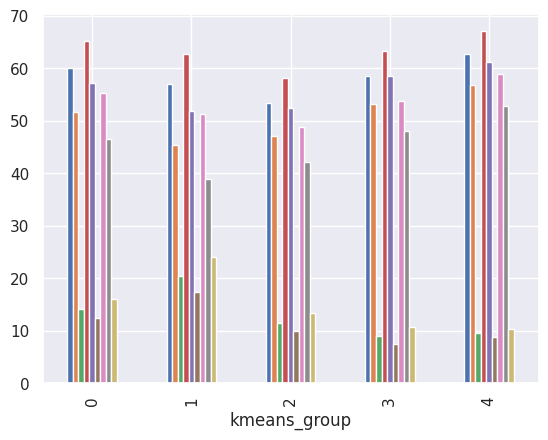

In [ ]:
res = df[['asexos_tactividad', 'asexos_templeo', 'asexos_tparo', 'hombres_tactividad','hombres_templeo', 'hombres_tparo', 'mujeres_tactividad', 'mujeres_templeo', 'mujeres_tparo','kmeans_group']].groupby(('kmeans_group')).mean()
res.plot(kind='bar', legend=False)

<Axes: xlabel='kmeans_group'>

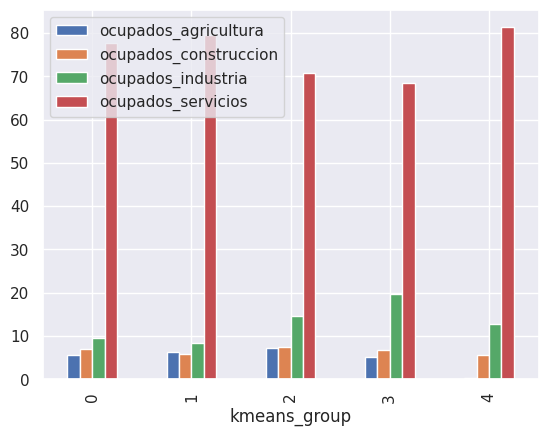

In [ ]:
res = df[['ocupados_agricultura', 'ocupados_construccion', 'ocupados_industria', 'ocupados_servicios','kmeans_group']].groupby(('kmeans_group')).mean()
res.plot(kind='bar', legend=True)

<Axes: xlabel='kmeans_group'>

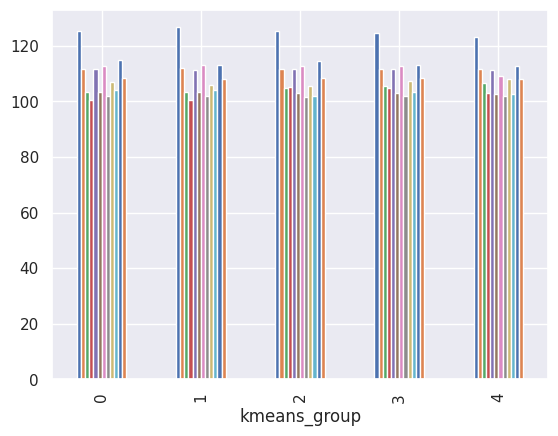

In [ ]:
res = df[['ipc_alim', 'ipc_bebi', 'ipc_vest', 'ipc_vivi', 'ipc_hoga', 'ipc_sani', 'ipc_trans', 'ipc_comu', 'ipc_ocio', 'ipc_ense', 'ipc_resta', 'ipc_otros','kmeans_group']].groupby(('kmeans_group')).mean()
res.plot(kind='bar', legend=False)

<Axes: xlabel='kmeans_group'>

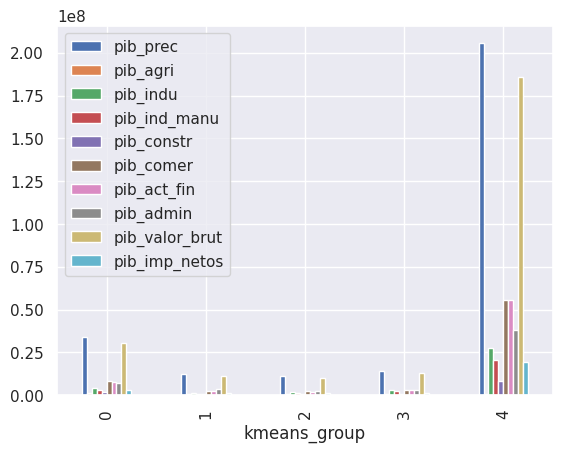

In [ ]:
res = df[['pib_prec', 'pib_agri', 'pib_indu', 'pib_ind_manu', 'pib_constr', 'pib_comer', 'pib_act_fin', 'pib_admin', 'pib_valor_brut', 'pib_imp_netos','kmeans_group']].groupby(('kmeans_group')).mean()
res.plot(kind='bar', legend=True)

Los grupos 2 y 3 tiene altas despoblamiento

* En comun tienen **asexos_tactividad** y **ocupados_servicios** por debajo de los demas grupos

# DBSCAN



La idea clave de los algoritmos de clustering basados en densidad es que asumen que los grupos
están definidos en áreas de gran densidad de datos. Las zonas pocos densas separan los grupos.
DBSCAN es el primer algoritmo que se definió basado en la densidad describiéndose los conceptos
de punto central, borde y ruido. Los puntos centrales poseen un área de vecindad para
un determinado radio que tiene por lo menos un número mínimo de puntos, o sea que su área de
vecindad excede un determinado umbral

### Parametrización


Dibujamos en un gráfico la distancia mas corta al vecino para obtener el epsilon a utilizar en DBSCAN.
Como MintPts ponemos un número bajo, considerando que tener 3 estados parecidos es ya sinónimo de un área densa.

NOTA: Para realizar estos cálculos nos vamos a apoyar en la matriz de similitud calculada para la ejecución del Algoritmo Jerárquico


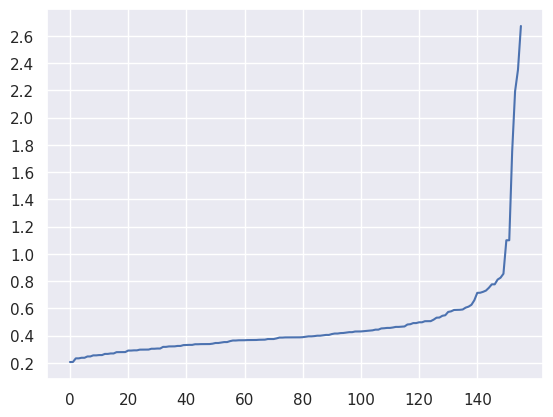

In [ ]:
minPts=3
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(datanorm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(datanorm):
    for j in range(len(datanorm)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])

seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0, 150, 20))
ax.set_yticks(numpy.arange(0, 3, 0.2))

plt.plot(seq)


plt.show()

Aunque se podría probar con otras opciones vamos a optar por probar  a realizar diferntes clusters desde 0.2 a 0.7 con intervalos de 0.1. De todas formas la disposición de los datos hará que DBSCAN únicamente aisle una zona densa de aquellos elementos que considera *outliers*

## Ejecución

In [ ]:
from sklearn.cluster import DBSCAN

for eps in numpy.arange(0.20, 0.7, 0.10):
  db = DBSCAN(eps, min_samples=minPts).fit(datanorm)
  core_samples_mask = numpy.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  print (eps, n_clusters_)

#labels

0.2 0
0.30000000000000004 3
0.4000000000000001 2
0.5000000000000001 2
0.6000000000000001 1


In [ ]:
db = DBSCAN(eps=0.5, min_samples=minPts).fit(datanorm)
labels = db.labels_
labels

array([ 0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  1,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
       -1])

Visualizamos los resultados

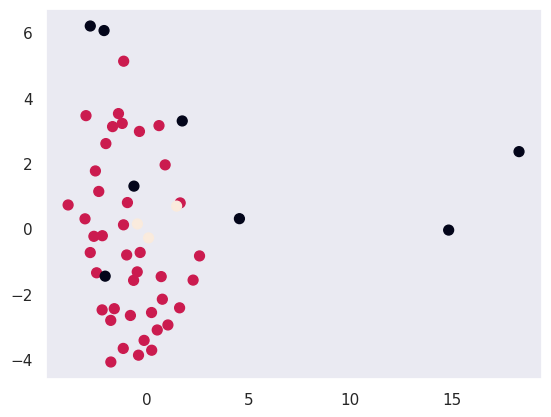

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
plt.grid()
plt.show()

Y aunque podríamos proceder a su intepretación en este caso lo que vamos a hacer es identificar aquellos elementos que son outliers

In [ ]:
df['dbscan_group'] = labels

In [ ]:
df[df['dbscan_group'] == -1]

porcen_desp  pob_tot  pob_hom  pob_muj  asexos_tactividad  \
nom_prov                                                                       
Almería                     62   753920   385180   368740              61.16   
Barcelona                   37  5805500  2833196  2972304              62.17   
Lugo                        43   323956   157083   166873              52.50   
Madrid                      36  6859914  3279823  3580091              63.41   
Sevilla                     13  1957210   954887  1002323              58.28   
Valencia/València           48  2656291  1298685  1357606              60.34   
Ceuta                        0    83039    41894    41145              61.31   
Melilla                      0    85491    43047    42444              57.29   

                   asexos_templeo  asexos_tparo  hombres_tactividad  \
nom_prov                                                              
Almería                     51.44         15.87               67.63   
Barcelona                   56.66          8.86               66.25   
Lugo                        48.07          8.43               54.78   
Madrid                      56.94         10.20               67.83   
Sevilla                     48.58         16.64               62.55   
Valencia/València           53.19         11.85               65.64   
Ceuta                       44.84         26.87               66.11   
Melilla                     43.85         23.45               62.83   

                   hombres_templeo  hombres_tparo  ...  pib_ind_manu  \
nom_prov                                           ...                 
Almería                      57.62          14.76  ...       1020119   
Barcelona                    60.46           8.74  ...      27764672   
Lugo                         50.52           7.76  ...        475584   
Madrid                       61.84           8.84  ...      13175614   
Sevilla                      53.72          14.11  ...       3332648   
Valencia/València            59.07          10.01  ...       8488474   
Ceuta                        52.27          20.94  ...         22099   
Melilla                      48.33          23.06  ...         14252   

                   pib_constr  pib_comer  pib_act_fin  pib_admin  \
nom_prov                                                           
Almería                723957    3793774      2816431    3041318   
Barcelona             7393843   42489644     42975113   31456531   
Lugo                   399301    1781960      1294058    1701452   
Madrid                9638924   68316587     68867253   44835198   
Sevilla               2056824    8375772      8537199   10157146   
Valencia/València     3179743   13611449     13769682   12158250   
Ceuta                   73384     315553       268574     840997   
Melilla                 73277     269691       266541     783628   

                   pib_valor_brut  pib_imp_netos  group  kmeans_group  \
nom_prov                                                                
Almería                  14167865        1491757      3             0   
Barcelona               157172903       16548982      1             4   
Lugo                      6690870         704492      2             2   
Madrid                  214911881       22628411      1             4   
Sevilla                  36784601        3873109      4             0   
Valencia/València        55560533        5850056      4             0   
Ceuta                     1597008         168151      3             1   
Melilla                   1462549         153994      3             1   

                   dbscan_group  
nom_prov                         
Almería                      -1  
Barcelona                    -1  
Lugo                         -1  
Madrid                       -1  
Sevilla                      -1  
Valencia/València            -1  
Ceuta                        -1  
Melilla                      -1  

[8 rows x 42 columns]

<Axes: xlabel='dbscan_group'>

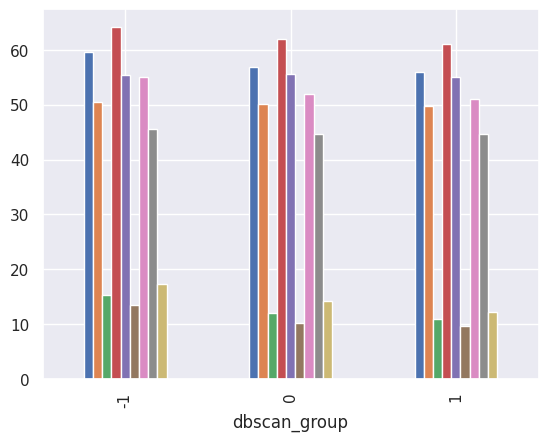

In [ ]:
res = df[['asexos_tactividad', 'asexos_templeo', 'asexos_tparo', 'hombres_tactividad','hombres_templeo', 'hombres_tparo', 'mujeres_tactividad', 'mujeres_templeo', 'mujeres_tparo','dbscan_group']].groupby(('dbscan_group')).mean()
res.plot(kind='bar', legend=False)

<Axes: xlabel='dbscan_group'>

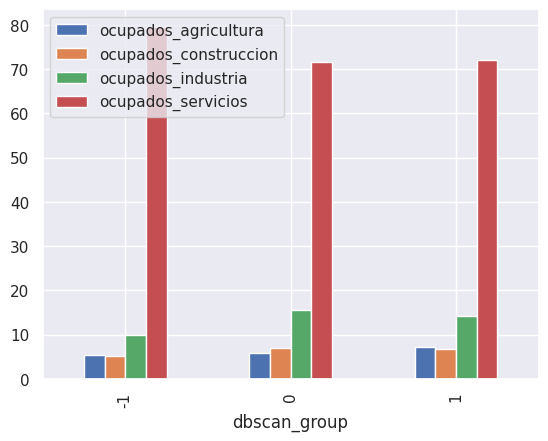

In [ ]:
res = df[['ocupados_agricultura', 'ocupados_construccion', 'ocupados_industria', 'ocupados_servicios','dbscan_group']].groupby(('dbscan_group')).mean()
res.plot(kind='bar', legend=True)

<Axes: xlabel='dbscan_group'>

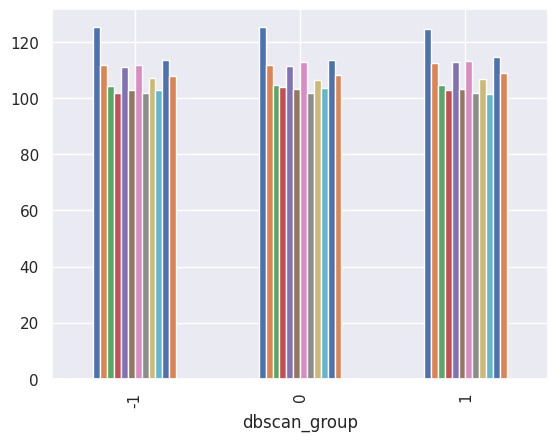

In [ ]:
res = df[['ipc_alim', 'ipc_bebi', 'ipc_vest', 'ipc_vivi', 'ipc_hoga', 'ipc_sani', 'ipc_trans', 'ipc_comu', 'ipc_ocio', 'ipc_ense', 'ipc_resta', 'ipc_otros','dbscan_group']].groupby(('dbscan_group')).mean()
res.plot(kind='bar', legend=False)

<Axes: xlabel='dbscan_group'>

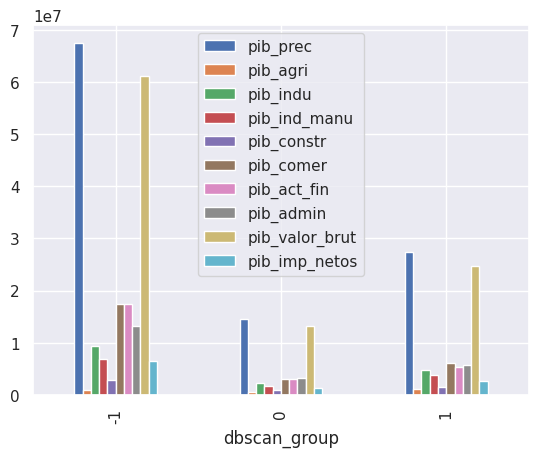

In [ ]:
res = df[['pib_prec', 'pib_agri', 'pib_indu', 'pib_ind_manu', 'pib_constr', 'pib_comer', 'pib_act_fin', 'pib_admin', 'pib_valor_brut', 'pib_imp_netos','dbscan_group']].groupby(('dbscan_group')).mean()
res.plot(kind='bar', legend=True)

#  Expectation - Maximization

En el clustering probabilístico se parte de un conjunto de un conjunto de observaciones o muestras
las cuales son independientes e idénticamente distribuidas aleatoriamente. En este tipo de algoritmos
se asume que la probabilidad de que dado un cluster 𝑆𝑖 el conjunto de muestras 𝑌 pertenezca a ella,
tiene una forma paramétrica conocida, determinada por un conjunto de parámetros θ𝑖. Este conjunto
de parámetros dependerá de la distribución elegida. El objetivo en cuestión es buscar aquellas
distribuciones que mejor generan el conjunto de datos, y para ello se utiliza la información obtenida
por las muestras observadas para estimar de forma óptima los parámetros θ𝑖 de cada distribución
generadora.

En este caso vamos a optar por utilizar una combinación de Gaussianas bajo el Gaussian Mixture Model.

Con el fin de determinar el número de clusters (*k*) vamos a utilizar en este caso el [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) Bayesian Information Criterion. Este criterio compara el ajuste de diferentes modelos pero penalizando la complejidad del modelo (número de parámetros). El modelo con el menor valor de BIC es el que debe ser elegido

In [ ]:
from sklearn.mixture import GaussianMixture

lowest_bic = numpy.infty
bic = []
best_cv = 'full'
best_k = 3
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components_range = range(1, 7)
for cv_type in cv_types:
    for k in range(1, 7):
        gmm = GaussianMixture(n_components=k, covariance_type=cv_type, init_params='random')
        gmm.fit(X_pca)
        bic.append(gmm.bic(X_pca))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_cv = cv_type
            best_k = k

print ("Mejor valor K", best_k, "Mejor tipo de Covarianza", best_cv)

Mejor valor K 2 Mejor tipo de Covarianza full


Además de Calcular el mejor valor de K vamos además a graficar los resultados para obtener más información sobre el análisis realizado de acuerdo a lo recomendado en [enlace](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html)

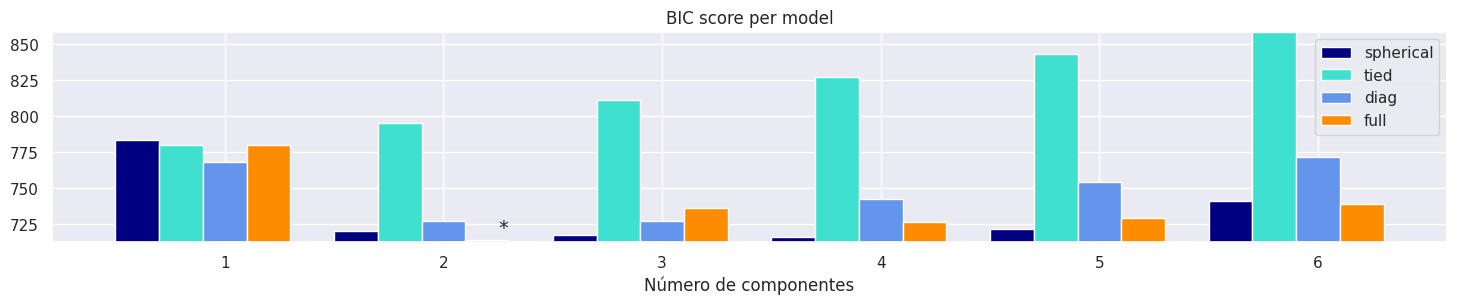

In [ ]:
# Plot the BIC scores
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
bars = []
plt.figure(figsize=(18, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = numpy.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([min(bic) * 1.01 - .01 * max(bic), max(bic)])
plt.title('BIC score per model')
xpos = numpy.mod(numpy.argmin(bic), len(n_components_range)) + .65 +\
    .2 * numpy.floor(numpy.argmin(bic) / len(n_components_range))
plt.text(xpos, min(bic) * 0.97 + .03 * max(bic), '*', fontsize=14)
spl.set_xlabel('Número de componentes')
spl.legend([b[0] for b in bars], cv_types)

Ejecutaremos el algoritmo con los mejores parámetros obtenidos

In [ ]:
EM = GaussianMixture(n_components=best_k, covariance_type=best_cv, init_params='random')
EM.fit(X_pca)
labels =  EM.predict(X_pca)
n_clusters = best_k - (1 if -1 in labels else 0)

Una vez ejecutado el módelo óptimo del algoritmo visualizamos los resultados utilizando la representación PCA

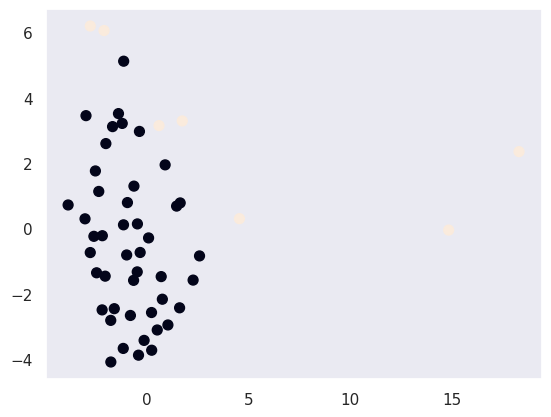

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
plt.grid()
plt.show()

Y procedemos a la interpretación de los resultados

In [ ]:
df['em_group'] = labels

In [ ]:
df['em_group']

nom_prov
Araba/Álava               0
Albacete                  0
Alicante/Alacant          0
Almería                   0
Ávila                     0
Badajoz                   0
Balears, Illes            0
Barcelona                 1
Burgos                    0
Cáceres                   0
Cádiz                     0
Castellón/Castelló        0
Ciudad Real               0
Córdoba                   0
Coruña, A                 0
Cuenca                    0
Girona                    0
Granada                   0
Guadalajara               0
Gipuzkoa                  0
Huelva                    0
Huesca                    0
Jaén                      0
León                      0
Lleida                    0
Rioja, La                 0
Lugo                      0
Madrid                    1
Málaga                    1
Murcia                    0
Navarra                   0
Ourense                   0
Asturias                  0
Palencia                  0
Palmas, Las               0
Pontevedra 

<Axes: xlabel='em_group'>

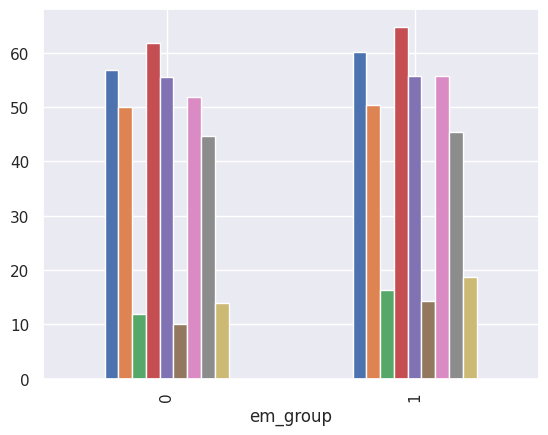

In [ ]:
res = df[['asexos_tactividad', 'asexos_templeo', 'asexos_tparo', 'hombres_tactividad','hombres_templeo', 'hombres_tparo', 'mujeres_tactividad', 'mujeres_templeo', 'mujeres_tparo','em_group']].groupby(('em_group')).mean()
res.plot(kind='bar', legend=False)

<Axes: xlabel='em_group'>

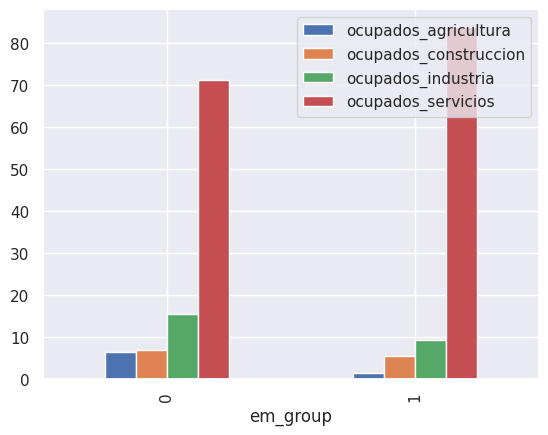

In [ ]:
res = df[['ocupados_agricultura', 'ocupados_construccion', 'ocupados_industria', 'ocupados_servicios','em_group']].groupby(('em_group')).mean()
res.plot(kind='bar', legend=True)

<Axes: xlabel='em_group'>

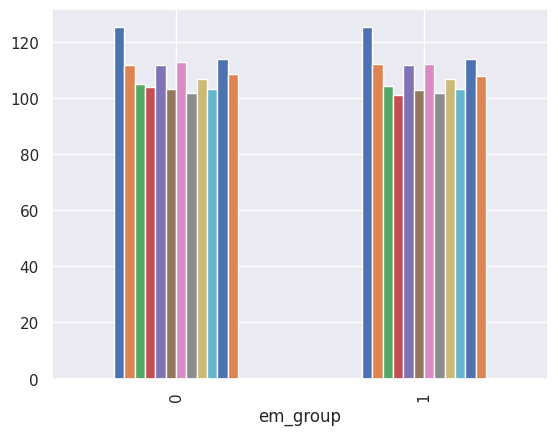

In [ ]:
res = df[['ipc_alim', 'ipc_bebi', 'ipc_vest', 'ipc_vivi', 'ipc_hoga', 'ipc_sani', 'ipc_trans', 'ipc_comu', 'ipc_ocio', 'ipc_ense', 'ipc_resta', 'ipc_otros','em_group']].groupby(('em_group')).mean()
res.plot(kind='bar', legend=False)

<Axes: xlabel='em_group'>

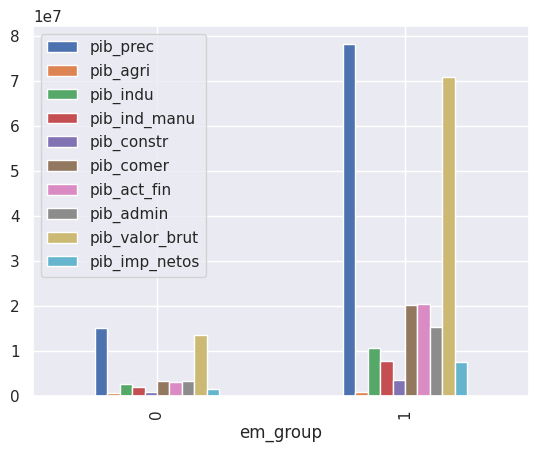

In [ ]:
res = df[['pib_prec', 'pib_agri', 'pib_indu', 'pib_ind_manu', 'pib_constr', 'pib_comer', 'pib_act_fin', 'pib_admin', 'pib_valor_brut', 'pib_imp_netos','em_group']].groupby(('em_group')).mean()
res.plot(kind='bar', legend=True)

En Grupo 0 estas las provincias con mas despoblamiento, caracteristicas destacadas del grupo
* asexos_tparo, hombres_tparo y mujeres_tparo, tasas bajas

* ocupados_industria alto, y ocupados_servicios bajo

* pib_prec y pib_valor_brut bajos. En general todos los pib bajos

In [ ]:
df.to_csv('despob_pob_actividad_activos_ipc_pib_2023_clusters.csv', index=False, sep=';', encoding='utf-8')